Tests for changing models and parameters.
Apologies for the lack of a proper poetry implementation. I wasn't sure the windows implementation (windows-curses) would throw a spanner into the works and I ran out of time to make a proper distributable package.


In [2]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
import gin
from DataUtils.Getdata import GetDataSets
from DataUtils.Getdata import ModuleTest
from Models.LineairModelCollection import CNN
import Models.LineairModelCollection

print(torch.version.cuda)
gin.enter_interactive_mode()


10.2


In [3]:
gin.parse_config_file("config.gin")

ParsedConfigFileIncludesAndImports(filename='config.gin', imports=[], includes=[])

In [4]:
torch.cuda.is_available()

False

In [5]:

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
batch_size=64
train_dataloader,test_dataloader = GetDataSets(batch_size, device)

In [7]:
train_dataloader.dataset
type(train_dataloader.dataset)

torchvision.datasets.mnist.FashionMNIST

In [8]:
X, y = next(iter(train_dataloader))
X.shape, y.shape

flat = nn.Flatten()
z = flat(X)
z.shape

torch.Size([64, 784])

In [9]:
img = X[0]
img.shape

torch.Size([1, 28, 28])

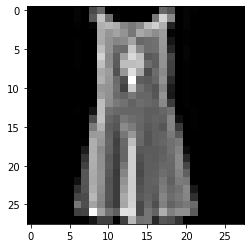

In [10]:
import matplotlib.pyplot as plt
plt.imshow(img.squeeze(), cmap="gray")

In [13]:
globaLlr = 0.02
globalEpochs = 10
globalsteps = 3

In [14]:
from Models.LineairModelCollection import BRBSequentialLow  

model = BRBSequentialLow().to(device)
print(model)

from Training.trainer import RunTrainer
import torch.optim as optim
adamOpt = optim.Adam
lossCross = torch.nn.CrossEntropyLoss()

RunTrainer(model=model, 
           train_dataloader=train_dataloader,
           test_dataloader=test_dataloader,
           learning_rate=globaLlr,
           epochs=globalEpochs,
           optimizer=adamOpt,
           loss_fn=lossCross,
           eval_steps=3,
           device=device,
           log_dir='..\\trained_models\\BRBSequentialLow\\'
           )

2022-05-24 15:16:41.799 | INFO     | Training.trainer:RunTrainer:71 - Logging to ..\trained_models\BRBSequentialLow\/20220524-1516


BRBSequentialLow(
  (dense): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=392, bias=True)
    (2): ReLU()
    (3): Linear(in_features=392, out_features=10, bias=True)
  )
)
..\trained_models\BRBSequentialLow\
Epoch : 0 - train loss =0.009295086888968945
testloss :0.00901151867583394 -  test accuracy :0.8177083134651184
Epoch : 1 - train loss =0.007300118097787102
testloss :0.008110451822479567 -  test accuracy :0.8333333134651184
Epoch : 2 - train loss =0.007012746451298396
testloss :0.00671760148058335 -  test accuracy :0.8489583134651184
Epoch : 3 - train loss =0.006931191532313824
testloss :0.008875314456721147 -  test accuracy :0.8072916865348816
Epoch : 4 - train loss =0.00683888526186347
testloss :0.007389550718168418 -  test accuracy :0.84375
Epoch : 5 - train loss =0.006832676541060209
testloss :0.006737591543545325 -  test accuracy :0.8645833134651184
Epoch : 6 - train loss =0.006542129131282369
testloss :0.007398912062247

In [23]:
from Models.LineairModelCollection import BRBSequentialHigh  

model = BRBSequentialHigh().to(device)
model.cuda()
print(model)

from Training.trainer import RunTrainer
import torch.optim as optim
adamOpt = optim.Adam
lossCross = torch.nn.CrossEntropyLoss()
lossCross.cuda()

RunTrainer(model=model, 
           train_dataloader=train_dataloader,
           test_dataloader=test_dataloader,
           learning_rate=globaLlr,
           epochs=globalEpochs,
           optimizer=adamOpt,
           loss_fn=lossCross,
           eval_steps=3,
           device=device,
           log_dir='..\\trained_models\\BRBSequentialHigh\\'
           )

2022-05-19 10:25:42.557 | INFO     | Training.trainer:RunTrainer:71 - Logging to ..\trained_models\BRBSequentialHigh\20220519-1025


BRBSequentialHigh(
  (dense): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=784, bias=True)
    (2): ReLU()
    (3): Linear(in_features=784, out_features=784, bias=True)
    (4): ReLU()
    (5): Linear(in_features=784, out_features=784, bias=True)
    (6): ReLU()
    (7): Linear(in_features=784, out_features=784, bias=True)
    (8): ReLU()
    (9): Linear(in_features=784, out_features=784, bias=True)
    (10): ReLU()
    (11): Linear(in_features=784, out_features=784, bias=True)
    (12): ReLU()
    (13): Linear(in_features=784, out_features=392, bias=True)
    (14): ReLU()
    (15): Linear(in_features=392, out_features=10, bias=True)
  )
)
..\trained_models\BRBSequentialHigh
Epoch : 0 - train loss =0.035985493286450704
testloss :0.035940914104382195 -  test accuracy :0.1145833358168602
Epoch : 1 - train loss =0.03582356862624486
testloss :0.03502980122963587 -  test accuracy :0.3958333432674408
Epoch : 2 - train loss =0.02329303823

In [15]:
from Models.LineairModelCollection import BRBSequentialVariable

model = BRBSequentialVariable().to(device)

print(model)

from Training.trainer import RunTrainer
import torch.optim as optim
adamOpt = optim.Adam
lossCross = torch.nn.CrossEntropyLoss()


RunTrainer(model=model, 
           train_dataloader=train_dataloader,
           test_dataloader=test_dataloader,
           learning_rate=globaLlr,
           epochs=globalEpochs,
           optimizer=adamOpt,
           loss_fn=lossCross,
           eval_steps=3,
           device=device,
           log_dir='..\\trained_models\\BRBSequentialVariable\\'
           )

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx